# Building a Regression Model That Can Predict The Insurance Price Given A Dataset

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The Data Columns

In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [34]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [35]:
cat = df.select_dtypes(include=['object']).columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [36]:
num = df.select_dtypes(include=['float64', 'int64']).columns
num

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

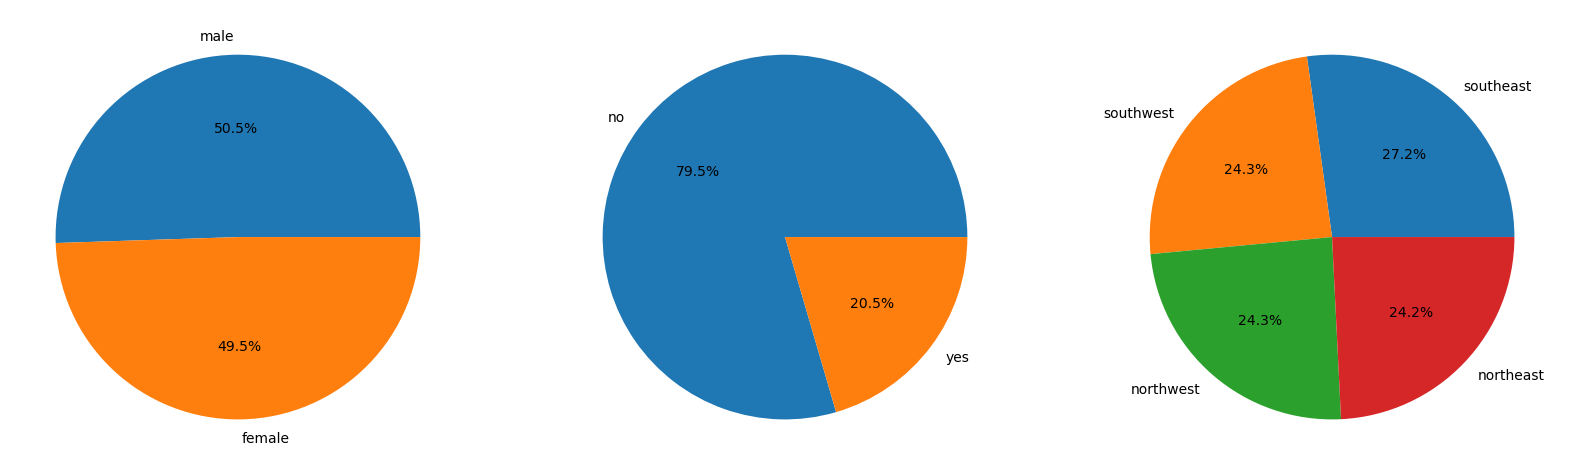

In [4]:
feature = ['sex', 'smoker', 'region']
plt.subplots(figsize=(20,10))
for i, col in enumerate(feature):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values, labels= x.index, autopct='%1.1f%%')

plt.show()

 # How is the 'sex' variable distributed in the dataset? Is it balanced?

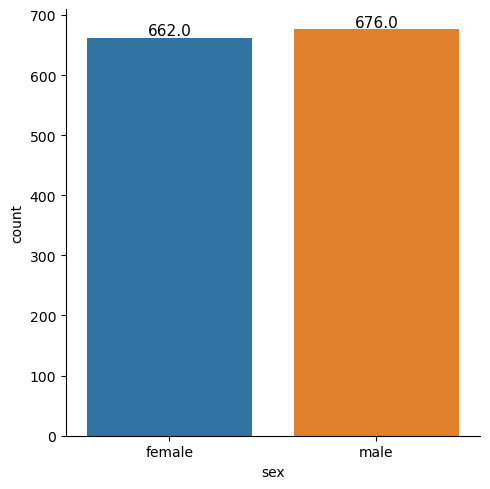

In [47]:

x = sns.catplot(x='sex', kind='count',data=df)
ax = x.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Observation: The male gender ranks higher, therefore the sex variable is not balanced

#  What is the proportion of smokers versus non-smokers in the dataset?

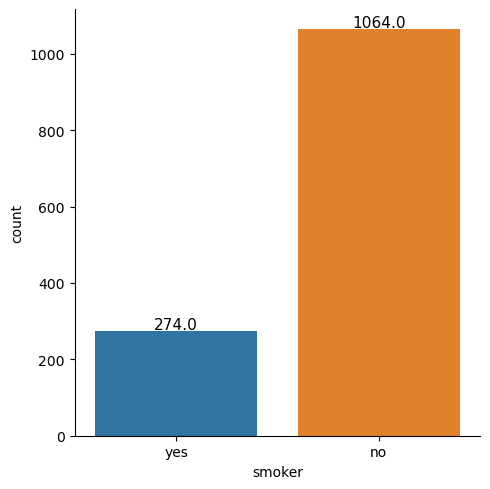

In [49]:

x = sns.catplot(x='smoker', kind='count',data=df)
ax = x.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [48]:
smoker_distribution = df['smoker'].value_counts(normalize=True)
print("Proportion of smokers versus non-smokers:")
print(smoker_distribution)


Proportion of smokers versus non-smokers:
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64


 # How are the different regions represented in the dataset? Is there any region that dominates the data?

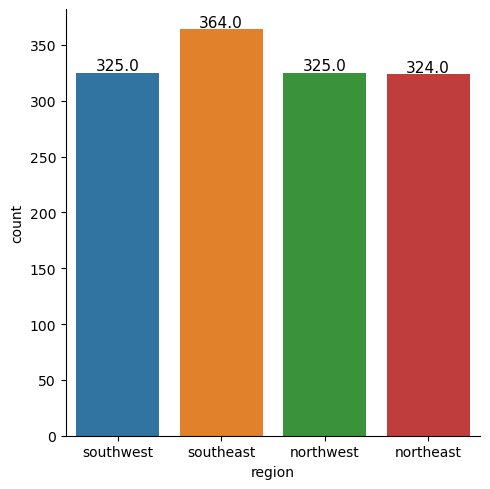

In [50]:

x = sns.catplot(x='region', kind='count',data=df)
ax = x.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

The southeast region seems to dominate more

 # Is there a correlation between 'age' and 'expenses'? How does age influence medical expenses?

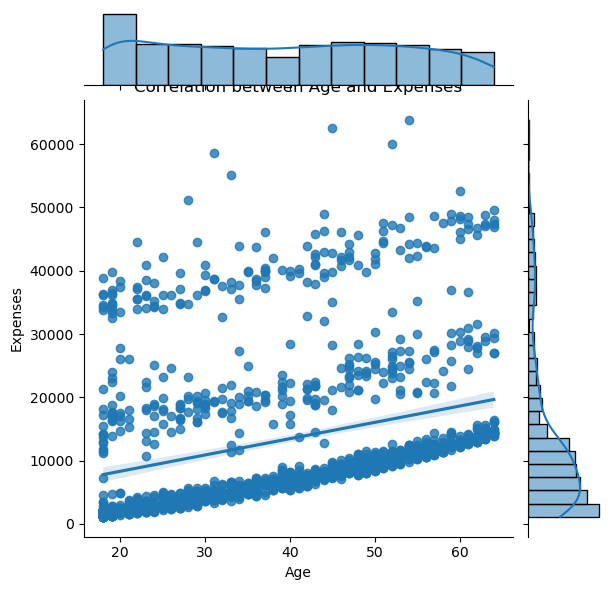

In [51]:
# Scatter plot with regression line
sns.jointplot(x='age', y='expenses', data=df, kind='reg')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.title('Correlation between Age and Expenses')
plt.show()

# How does smoking status affect medical expenses?

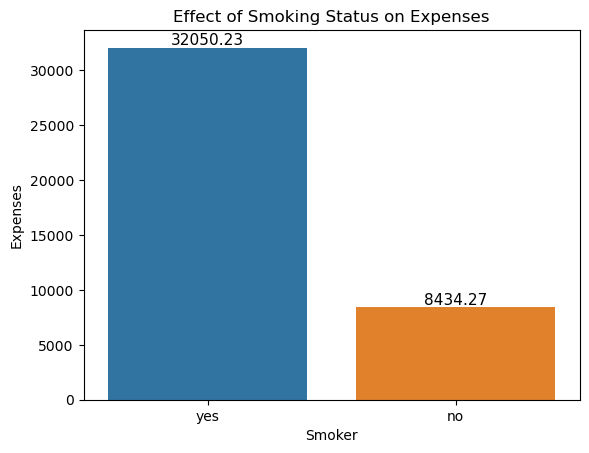

In [71]:
# Box plot
ax = sns.barplot(x='smoker', y='expenses', data=df, errorbar=None)
plt.xlabel('Smoker')
plt.ylabel('Expenses')
plt.title('Effect of Smoking Status on Expenses')

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Observation: From the chart above, it can be seen that those who smoke tends to have higher expenses

   # Do individuals with more children tend to have higher medical expenses?

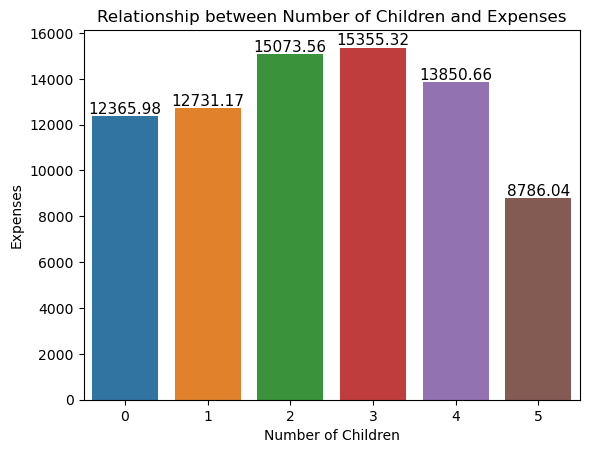

In [70]:
ax = sns.barplot(x='children', y='expenses', data=df, errorbar=None)  # ci=None removes error bars
plt.xlabel('Number of Children')
plt.ylabel('Expenses')
plt.title('Relationship between Number of Children and Expenses')

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


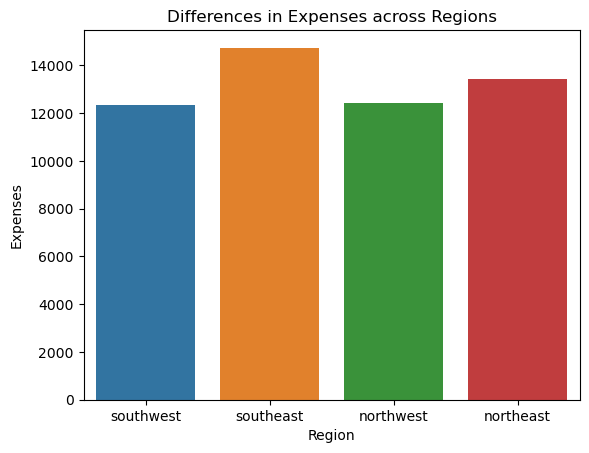

In [73]:
sns.barplot(x='region', y='expenses', data=df,errorbar=None)
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.title('Differences in Expenses across Regions')
plt.show()

# How do 'age', 'bmi', and 'children' collectively impact medical expenses?

In [76]:
import statsmodels.api as sm

# Multiple regression model
X = sm.add_constant(df[['age', 'bmi', 'children']])
y = df['expenses']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.74
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           8.32e-37
Time:                        18:08:48   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6929.3145   1757.434     -3.943      0.0

# Checking for outliers in the numerical features of the dataset

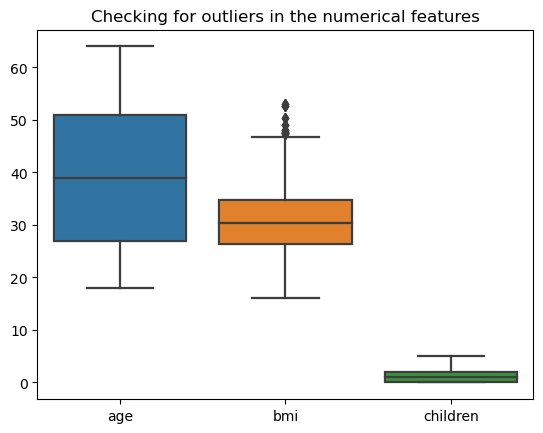

In [38]:
test = ['age', 'bmi', 'children']

for i in test:
    sns.boxplot(df[test])
    plt.title('Checking for outliers in the numerical features')
    

plt.show()

The bmi column has outlier and this could affect any analysis that needs to be done with the bmi, i will work on the outliers by replacing the values with median 

In [7]:
col = 'bmi'
q1 = df[col].quantile(0.25)
q2 = df[col].quantile(0.5)
q3 = df[col].quantile(0.75)

iqr = q3 - q1
low = q1 - 1.5 * iqr
up = q3+1.5*iqr


In [8]:
low

13.699999999999998

In [9]:
up

47.300000000000004

In [10]:
# Create a boolean mask for outliers
outlier_mask = (df[col] < low) | (df[col] > up)
outlier_mask

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [11]:
df_no_outliers = df[~outlier_mask]

df_no_outliers

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


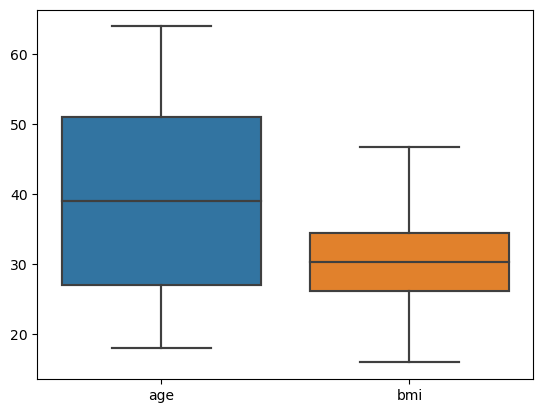

In [12]:
test = ['age', 'bmi']

for i in test:
    sns.boxplot(df_no_outliers[test])

plt.show()

In [13]:
test = ['age', 'bmi', 'expenses']
for i in test:
    x = df[test].skew()

x

age         0.055673
bmi         0.284593
expenses    1.515880
dtype: float64

In [14]:
categorical = df_no_outliers.select_dtypes(include=['object']).columns
categorical

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
cat_cols = ['sex', 'smoker', 'region']

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [17]:
# Iterate through each categorical column and encode its values
for col in cat_cols:
    # Fit LabelEncoder on the unique values in the column and transform the column
    df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])


df_no_outliers

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [18]:
df_no_outliers.shape

(1329, 7)

A little dictionary: 
After applying labelencoding these were the results;
- Sex: 0 - Male, 1 - female,
- Smoker: 1 - yes, 0 - no,
- Region: 0 - northwest, 1 - northeast, 2 - Southeast, 3 -southwest

# Model Development

In [19]:
# creating the train, validation and test datasets

X = df_no_outliers.drop(['expenses'], axis=1)
y = df_no_outliers[['expenses']]

In [20]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [21]:
l1 = []
l2 = []
l3 = []

cvs = 0
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    l1.append(lr_model.score(X_train, y_train))
    l2.append(lr_model.score(X_test, y_test))
    cvs = (cross_val_score(lr_model, X, y, cv=5,)).mean()
    l3.append(cvs)
    df1 = pd.DataFrame({'train_data score':l1, 'test_data_score': l2, 'cvs score':l3})
    

In [22]:
df1 = pd.DataFrame({'train_data score':l1, 'test_data_score': l2, 'cvs score':l3})
df1

,train_data score,test_data_score,cvs score
0,0.757651,0.729127,0.746587
1,0.757651,0.729127,0.746587
2,0.757651,0.729127,0.746587
3,0.757651,0.729127,0.746587
4,0.757651,0.729127,0.746587
...,...,...,...
95,0.757651,0.729127,0.746587
96,0.757651,0.729127,0.746587
97,0.757651,0.729127,0.746587
98,0.757651,0.729127,0.746587


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('LinearRegression')
lr_model_train_score = lr_model.score(X_train, y_train)
lr_model_test_score = lr_model.score(X_test, y_test)
lr_model_val_score = cross_val_score(lr_model,X,y,cv=5,).mean()
print('Train data score',lr_model.score(X_train, y_train))
print('Test data score', lr_model.score(X_test, y_test))
print('Validation data score',cross_val_score(lr_model,X,y,cv=5,).mean())

LinearRegression
Train data score 0.7397227862382687
Test data score 0.7735644317501004
Validation data score 0.746587324777285


RandomForestRegressor

In [24]:
rfmodel= RandomForestRegressor(random_state=42)

rfmodel.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred_train_rf=rfmodel.predict(X_train)

y_pred_test_rf=rfmodel.predict(X_test)

print(r2_score(y_train,y_pred_train_rf))
print(r2_score(y_test,y_pred_test_rf))

print(cross_val_score(rfmodel,X,y,cv=5,).mean())

0.974807110357597
0.8355474729150283
0.8342735381274666


In [26]:
estimator= RandomForestRegressor(random_state=42)

param_grid= {'n_estimators':[10,30,60,78,90,130,160]}

grid= GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_estimators': 160}


In [27]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=160)

rfmodel.fit(X_train,y_train)

y_pred_train_rf2=rfmodel.predict(X_train)
y_pred_test_rf2=rfmodel.predict(X_test)
print('RandomForestRegressor')

rf_model_train_score = r2_score(y_train,y_pred_train_rf2)
rf_model_test_score = r2_score(y_test,y_pred_test_rf2)
rf_model_val_score = cross_val_score(rfmodel,X,y,cv=5,).mean()

print(r2_score(y_train,y_pred_train_rf2))

print(r2_score(y_test,y_pred_test_rf2))

print(cross_val_score(rfmodel,X,y,cv=5,).mean())

RandomForestRegressor
0.97540903467028
0.8343483228304298
0.8335749625641207


GradientBoostingRegressor

In [28]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [29]:
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)


print(r2_score(y_train,y_pred_train_gb))
print(r2_score(y_test,y_pred_test_gb))
print(cross_val_score(gb_model,X,y,cv=5,).mean())

0.9001161327866969
0.865156144317514
0.8532703372232628


In [30]:
estimator = GradientBoostingRegressor()

param_grid={'n_estimators':[5,15,19,30,50,90],'learning_rate':[0.1,0.13,0.2,0.25,0.9,1]}

grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)

grid.fit(X_train,y_train)

print(grid.best_params_)

{'learning_rate': 0.25, 'n_estimators': 15}


In [31]:
gbmodel=GradientBoostingRegressor(n_estimators=55,learning_rate=0.1)

gbmodel.fit(X_train,y_train)
y_pred_train_gb= gbmodel.predict(X_train)
y_pred_test_gb = gbmodel.predict(X_test)


print(r2_score(y_train,y_pred_train_gb))

print(r2_score(y_test,y_pred_test_gb))

print(cross_val_score(gbmodel,X,y,cv=5,).mean())

0.8846449136685137
0.8734168767506835
0.858267206104507


In [32]:
gb_model_train_score = r2_score(y_train,y_pred_train_gb)
gb_model_test_score = r2_score(y_test,y_pred_test_gb)
gb_model_val_score = cross_val_score(gbmodel,X,y,cv=5,).mean()

In [33]:
xgmodel= XGBRegressor()
xgmodel.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred_train_xgb = xgmodel.predict(X_train)
y_pred_test_xgb = xgmodel.predict(X_test)

print(r2_score(y_train,y_pred_train_xgb))

print(r2_score(y_test,y_pred_test_xgb))

print(cross_val_score(xgmodel,X,y,cv=5,).mean())

0.9960141561039318
0.8037108482515277
0.8101850602853453


In [35]:
estimator=XGBRegressor()

param_grid={'n_estimators':[10,30,50,70,90],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)

grid.fit(X_train,y_train)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}


In [36]:
xgb_model = XGBRegressor(n_estimators=10,max_depth=3,gamma=0)
xgb_model.fit(X_train,y_train)
y_pred_train_xgb=xgb_model.predict(X_train)
y_pred_test_xgb=xgb_model.predict(X_test)


In [37]:
print(r2_score(y_train,y_pred_train_xgb))
print(r2_score(y_test,y_pred_test_xgb))
print(cross_val_score(xgb_model,X,y,cv=5,).mean())

0.8712055898406159
0.8752547495518861
0.8582395346198377


In [38]:
xgb_model_train_score = r2_score(y_train,y_pred_train_xgb)
xgb_model_test_score = r2_score(y_test,y_pred_test_xgb)
xgb_model_val_score = cross_val_score(xgb_model,X,y,cv=5,).mean()

# THE MODELS

In [39]:
train_score = []
test_score = []
validation_score = []
model_name = []

In [40]:
train_score

[]

In [41]:
#linear regression
train_score.append(lr_model_train_score)
test_score.append(lr_model_test_score)
validation_score.append(lr_model_val_score)
model_name.append('LinearRegression')

In [42]:
model_name

['LinearRegression']

In [43]:
#randomforestregressor
train_score.append(rf_model_train_score)
test_score.append(rf_model_test_score)
validation_score.append(rf_model_val_score)
model_name.append('RandomForestRegressor')



In [44]:
#gradient boosting
train_score.append(gb_model_train_score)
test_score.append(gb_model_test_score)
validation_score.append(gb_model_val_score)
model_name.append("GradientBoostingRegressor")

In [45]:
# xgb regressor model
train_score.append(xgb_model_train_score)
test_score.append(xgb_model_test_score)
validation_score.append(xgb_model_val_score)
model_name.append("XGBoostRegressor")

In [46]:
# model table
model_table = pd.DataFrame({
    'model_name': model_name,
    'model_train_score' : train_score,
    'model_test_score' : test_score,
    'model validation score' : validation_score})
model_table

,model_name,model_train_score,model_test_score,model validation score
0,LinearRegression,0.739723,0.773564,0.746587
1,RandomForestRegressor,0.975409,0.834348,0.833575
2,GradientBoostingRegressor,0.884645,0.873417,0.858267
3,XGBoostRegressor,0.871206,0.875255,0.858240


XGBoost Regressor is the best model to use based on its test score (0.875255)

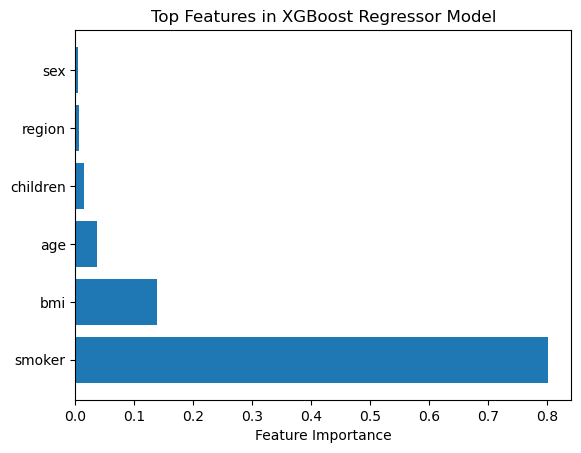

In [47]:
feature_importance = xgb_model.feature_importances_

# Map Feature Importance to Features
feature_names = list(X.columns)
feature_importance_map = dict(zip(feature_names, feature_importance))

# Sort and Visualize
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)
top_features = [feature[0] for feature in sorted_features]
top_importance = [feature[1] for feature in sorted_features]

plt.barh(top_features, top_importance)
plt.xlabel('Feature Importance')
plt.title('Top Features in XGBoost Regressor Model')
plt.savefig('rf_features.png')
plt.show()


In [48]:
xgb_model_features= pd.DataFrame({'Feature': top_features, 'Importance': top_importance})
xgb_model_features = xgb_model_features.sort_values(by='Importance', ascending=False)
xgb_model_features

,Feature,Importance
0,smoker,0.801050
1,bmi,0.137633
2,age,0.036496
3,children,0.014553
4,region,0.006826
5,sex,0.003442


In [49]:
important_features = xgb_model_features[xgb_model_features['Importance']>0.01]
important_features


,Feature,Importance
0,smoker,0.801050
1,bmi,0.137633
2,age,0.036496
3,children,0.014553


In [50]:
df_no_outliers.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [51]:
df_no_outliers.drop(df_no_outliers[['sex','region']],axis=1,inplace=True)

In [52]:
xf = df_no_outliers.drop(df_no_outliers[['expenses']], axis=1)
x = df_no_outliers.drop(df_no_outliers[['expenses']], axis=1)

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(xf, y, test_size=0.3, random_state=42)
finalmodel = XGBRegressor(n_estimators=10, max_depth =3, gamma=0)
finalmodel.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred_train=finalmodel.predict(xtrain)
y_pred_test=finalmodel.predict(xtest)
print(r2_score(ytrain,y_pred_train))
print(r2_score(ytest,y_pred_test))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())

0.8690045483486835
0.8752735098191499
0.8582395346198377


In [55]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))


In [57]:
new_data=pd.DataFrame({'age':49,'sex':'female','bmi':27.9,'children':4,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([24917.623], dtype=float32)